In [1]:
from fastai.vision.all import *

# Point to the parent folder
path = Path('/path/to/brain_tumor_dataset')

# Combine Training + Testing images
combined_path = path/'all_data'

# Create this folder and copy images from both folders into it (do once)
import shutil

if not combined_path.exists():
    combined_path.mkdir()
    for folder in ['Training', 'Testing']:
        for class_dir in (path/folder).ls():
            dest = combined_path/class_dir.name
            dest.mkdir(exist_ok=True)
            for file in class_dir.ls():
                shutil.copy(file, dest/file.name)


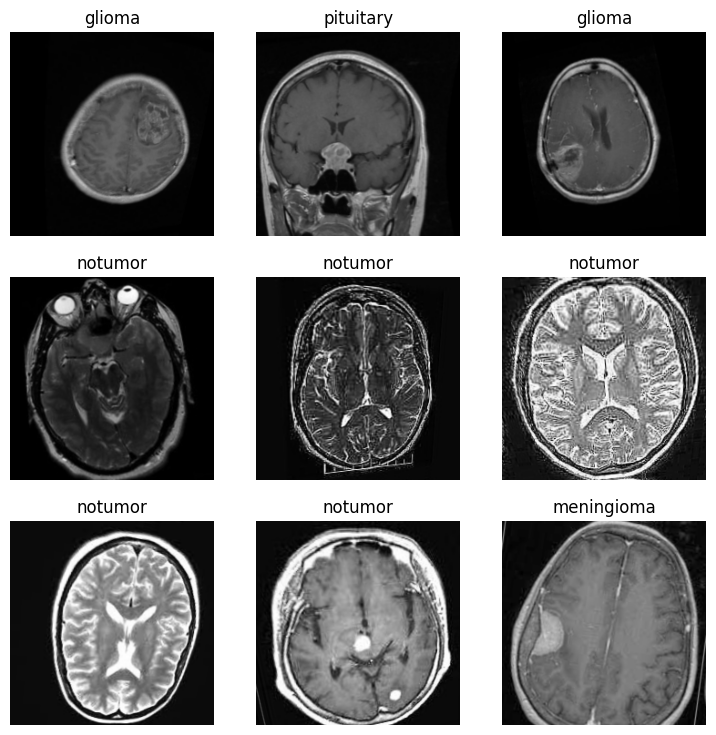

In [2]:
dls = ImageDataLoaders.from_folder(
    combined_path,
    valid_pct=0.2,
    seed=42,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(),
    bs=32
)

dls.show_batch(max_n=9)

In [3]:
learn = cnn_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(5)

C:\Users\HP\anaconda3\envs\fastai_env\lib\site-packages\fastai\vision\learner.py:303: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.680366,0.362289,0.881766,19:06


epoch,train_loss,valid_loss,accuracy,time
0,0.328350,0.154210,0.948718,44:25
1,0.211526,0.162392,0.952991,14:58
2,0.131535,0.149887,0.943732,22:16
3,0.065696,0.050617,0.987179,22:22
4,0.041839,0.044620,0.986467,22:37


In [6]:
interp = ClassificationInterpretation.from_learner(learn)

<Figure size 1000x1000 with 0 Axes>

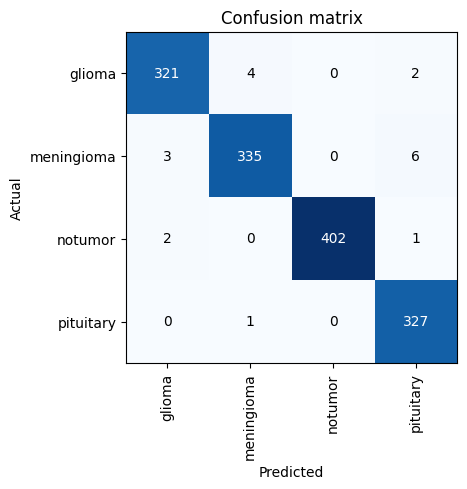

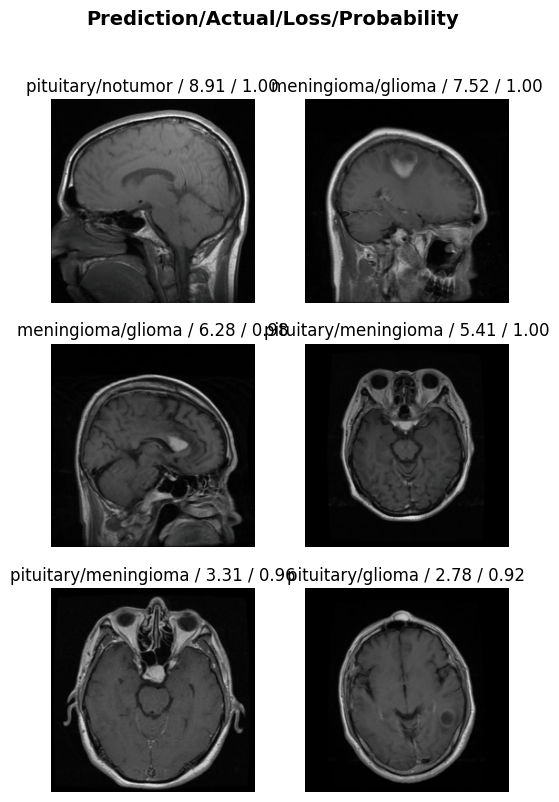

In [18]:
plt.figure(figsize=(10, 10))
interp.plot_confusion_matrix()
interp.plot_top_losses(6, nrows=3)

In [20]:
my_img = "C:/Users/HP/Desktop/ITS530_Spring2025/Data/Testing/meningioma/Te-me_0037.jpg"
img = PILImage.create( my_img )

In [21]:
pred_class, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred_class}, Confidence: {probs[pred_idx]:.2%}")


Prediction: meningioma, Confidence: 99.92%


In [22]:
img = PILImage.create("C:/Users/HP/Desktop/ITS530_Spring2025/Data/Testing/notumor/Te-no_0028.jpg")

In [23]:
pred_class, pred_idx, probs = learn.predict(img)

print(f"Prediction: {pred_class}, Confidence: {probs[pred_idx]:.2%}")

Prediction: notumor, Confidence: 99.69%
